## Homework 4 for Machine learning with python (Telecom customer chrun) 
dataset: https://github.com/SKawsar/machine_learning_with_python/blob/main/Churn.csv   
Actual dataset source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python   
  
#### Telecom customer's churn means moving from current telecom service to another telecome service.  
#### This excercise is conducted to develop a best model which can  successfully predict that customer will churn or not in future based on given features.

### Import required liberies

In [31]:
import os
import pandas as pd # to load and manipulating data and for one_hot encoding
import numpy as np # to calculate mean and standard deviations

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix # to draw confusion_matrix

import matplotlib.pyplot as plt # to draw graph
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset and perform data preprocessing


In [32]:
#Load dataset
#Changing working directory
os.chdir(r'H:\EMK_Data analysis with python')

#Read 'csv' file
df = pd.read_csv('churn.csv',encoding = 'unicode_escape')

display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [33]:
print(df.shape)

(3333, 21)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Here,categorical features present which need to convert to numeric to perform machine learning.  
#### And some unnecessary features need to drop.

In [35]:
#Data Preprocessing
# 1st drop the 3 features which we assume no connection with churn value; To reduce unnecessary features
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

In [36]:
#To find out unique values of categorical variables 
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [37]:
df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

In [38]:
display(df.head(10))
print(df.shape)
df.info()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 n

### 2. Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding


#### In this dataset categorical features are non-ordinal(only yes and No). We can't set them to any highest to lowest order.   
#### So, One-hot encoding will be work better.   
#### But there is no need encoding for this dataset as we already replace yes and no with 0 and 1.

### 3. Perform Data Transformation (StandardScaler or MinMaxScaler).     
### Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?


In [39]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000


In [40]:
#Feature(X) and target(y) variable separation
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


In [41]:
# normalize the feature(X) columns 
# scaler = MinMaxScaler()

# for col in X.columns:
#     X[col] = scaler.fit_transform(X[[col]])

# display(X.sample(10))

In [42]:
# X.describe()

In [43]:
# standarize the feature(X) columns 
scaler = StandardScaler()
for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
3241,1.907146,-0.591760,1.265624,-0.565618,-0.177431,0.380704,-0.427932,3.052685,-0.618396,0.875326,1.265677,-1.361185,-0.564624,-0.669934,-0.175486,-1.007560,0.378710
382,1.203914,-0.591760,-0.065647,-1.104013,0.961668,-1.625442,-1.188218,3.052685,-0.618396,-0.669570,-0.066138,-0.959571,-1.102904,-0.414384,0.962709,-0.194831,-1.624847
1237,-1.131823,-0.591760,-0.530215,-0.772693,-0.656011,0.524001,1.092641,-0.327580,-0.618396,-1.068253,-0.530599,-0.658361,-0.773439,0.761144,-0.654495,0.211534,0.524665
981,0.048603,1.161817,-1.248184,0.761635,1.333458,-1.195554,-0.427932,-0.327580,1.617086,-0.769241,-1.247813,0.094665,0.762516,-0.976594,1.331854,-0.194831,-1.200252
2069,-1.207169,-0.591760,1.495154,0.982515,-0.491870,-0.156656,-1.188218,-0.327580,-0.618396,0.925161,1.494667,0.245270,0.982932,0.607814,-0.491896,-1.007560,-0.152033
457,-1.182054,-0.591760,-0.366790,1.242838,-1.684365,-0.192480,0.332354,-0.327580,-0.618396,-0.071546,-0.366417,-1.813001,1.242792,-1.538803,-1.682827,1.024263,-0.191839
1241,1.455068,-0.591760,0.349342,-0.108080,0.245776,2.243555,2.613214,-0.327580,-0.618396,0.327137,0.349717,-0.457554,-0.107549,1.016693,0.246393,1.024263,2.249582
3145,-0.981130,-0.591760,0.128994,0.130549,-0.116126,-0.514897,1.092641,-0.327580,-0.618396,-0.320723,0.129368,-0.407352,0.131429,-0.107725,-0.113962,-0.194831,-0.510285
367,-1.408093,-0.591760,-1.865159,1.033791,1.070436,2.780916,-0.427932,-0.327580,-0.618396,1.323844,-1.865654,0.395875,1.033976,-0.005505,1.072574,-0.601195,2.780325
2032,1.254145,-0.591760,-1.117811,1.524855,-0.120081,1.061361,0.332354,-0.327580,-0.618396,1.373680,-1.118196,-1.762799,1.525853,-1.998792,-0.118357,2.243356,1.055408


In [44]:
X.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,1.713134e-16,3.832651e-16,7.081711e-16,-1.067919e-16,6.602046e-17,-3.274375e-16,3.275708e-16,-1.021951e-16,6.921823e-17,-2.150828e-16,-3.226409e-16,3.527531e-16,1.266447e-16,-7.041739e-17,-3.134473e-17,-1.264615e-16,2.785384e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.513172e+00,-5.917599e-01,-3.301096e+00,-3.963622e+00,-3.513648e+00,-3.667413e+00,-1.188218e+00,-3.275805e-01,-6.183963e-01,-5.005247e+00,-3.301162e+00,-5.025911e+00,-3.963679e+00,-3.429870e+00,-3.515366e+00,-1.820289e+00,-3.668210e+00
25%,-6.797448e-01,-5.917599e-01,-6.624241e-01,-6.780300e-01,-6.698545e-01,-6.223690e-01,-4.279320e-01,-3.275805e-01,-6.183963e-01,-6.695701e-01,-6.623760e-01,-6.583610e-01,-6.783123e-01,-6.699340e-01,-6.676792e-01,-6.011951e-01,-6.164341e-01
50%,-1.627644e-03,-5.917599e-01,-6.887677e-03,8.276141e-03,6.485803e-03,2.246393e-02,-4.279320e-01,-3.275805e-01,-6.183963e-01,2.812491e-02,-6.730063e-03,-5.738630e-03,8.459274e-03,-5.505089e-03,4.691242e-03,-1.948306e-01,2.045823e-02
75%,6.513740e-01,8.695542e-01,6.725198e-01,6.768330e-01,6.808485e-01,6.672969e-01,3.323545e-01,-3.275805e-01,1.617086e+00,6.759846e-01,6.726790e-01,6.970854e-01,6.766695e-01,6.589239e-01,6.814562e-01,6.178983e-01,6.706192e-01
max,3.564766e+00,3.134591e+00,3.140422e+00,3.209066e+00,3.839081e+00,3.497397e+00,5.654360e+00,3.052685e+00,1.617086e+00,3.217588e+00,3.140803e+00,3.508382e+00,3.207980e+00,3.827739e+00,3.836763e+00,6.307001e+00,3.496829e+00


#### Here, Data set performance is slightly imporved with standardScaler transformation. And tree based classification is not affected with variance value. So, I think is not necessary to perform transformation in this data set.

### 4. Perform Grid Search and Cross-Validation with Decision Tree Classifier


In [45]:
#Spilting dataset into training and testing subset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


In [46]:
#Stratification
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.16942355889724312


In [47]:
class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.1695906432748538


In [48]:
model = DecisionTreeClassifier(random_state=42)
model = model.fit(X_train, y_train)

#Grid search
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [49]:
#Best hyperparameters in the grid search
grid_result.best_params_


{'criterion': 'entropy', 'max_depth': 6}

In [50]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.952790,0.920601,0.937847,0.012654,1
4,gini,7,0.940043,0.925054,0.929336,0.954936,0.937768,0.937427,0.010316,2
2,gini,5,0.937901,0.914347,0.946467,0.944206,0.942060,0.936996,0.011672,3
9,entropy,7,0.935760,0.927195,0.946467,0.929185,0.942060,0.936133,0.007352,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.935622,0.937768,0.933136,0.010594,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.892704,0.899142,0.900982,0.011798,9
5,entropy,3,0.886510,0.905782,0.907923,0.892704,0.873391,0.893262,0.012747,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


### 5. Show a tree diagram of the Decision Tree


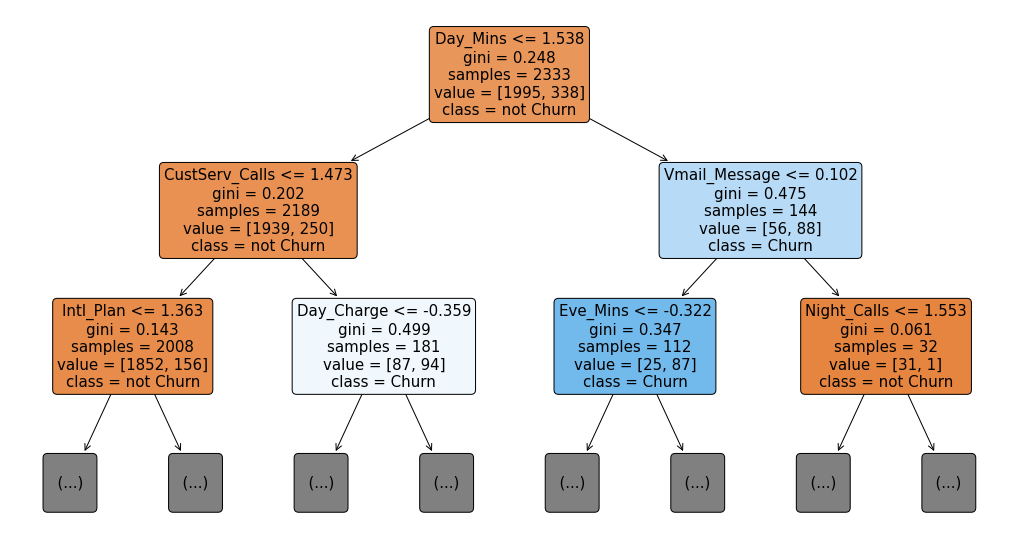

In [51]:
plt.figure(figsize = (18, 10))
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["not Churn", "Churn"],
          feature_names = X.columns,
          max_depth=2,
          fontsize=15)

plt.show()

### 6. Show the Confusion Matrix, Classification report, and ROC-AUC


In [52]:
y_pred = np.round(grid_result.predict(X_test), 2)

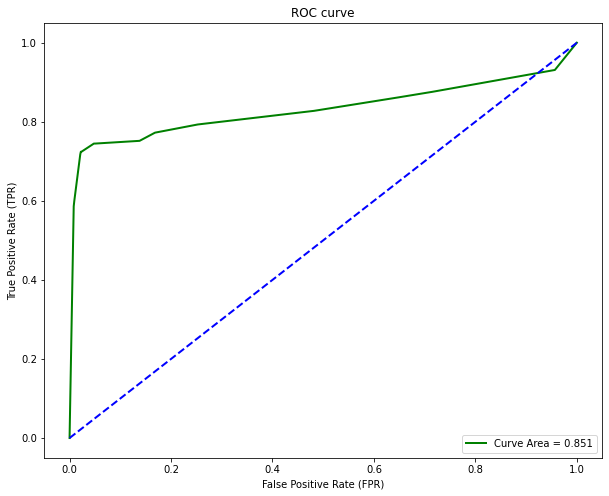

In [53]:
# ROC-AUC curve
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

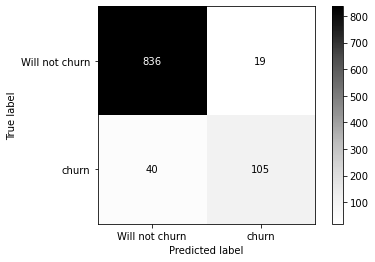

In [54]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not churn", "churn"],
                      cmap='Greys')
plt.show()

In [55]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

#Accuracy measured by skicit learn
print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[836  19]
 [ 40 105]]
Accuracy:  0.941
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.85      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



### 7. Explain accuracy, precision, recall, f1 score

In [56]:

TN = confusion_matrix_dt[0,0] 
# Actual value 'Will not churn' and machine successfully predicted that customer 'will not churn'
print("True Negatives = ", TN)

FN = confusion_matrix_dt[1,0] 
# Machine predicated that customer 'will not churn' but actually customer will'churn'
print("False Negatives = ", FN)

FP = confusion_matrix_dt[0,1]
# Machine predicated that customer 'churn' but actually customer 'will not churn'
print("False Positives = ", FP)

TP = confusion_matrix_dt[1,1] 
# Actual value 'churn' and machine successfully predicted that customer will 'churn'
print("True Positives = ", TP)

True Negatives =  836
False Negatives =  40
False Positives =  19
True Positives =  105


In [57]:
# calculate the accuracy of the model from the confusion matrix
accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ', accuracy)

Accuracy:  0.941


#### Accuracy is the ratio of number of correct prediction (TP + TN) to the total number of input sample (TP+FP+FN+TN). 
#### Higher is the better

In [58]:
#Precision  
precision = np.round(TP/(TP+FP), 2)

print("Precision = ", precision)

Precision =  0.85


#### Precision is the ratio of number of true positve to the number of classified positive(TP+FP) 
#### It identify the what percentage predicted positive value was correct.
#### Higher is the better


In [59]:
#Recall/Sensitivity/True positive rate
recall = np.round(TP/(TP+FN), 2)
print("Recall = ", recall)

Recall =  0.72


#### Precision is the ratio of number of true positve to the number of Actual positive value(TP+FN)
#### It measure the percent of predicted positive values which are correctly indentified.
#### Higher is the better

In [60]:
#F1-score
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)
print("f1 score = ", f1_score_)

f1 score =  0.78


#### It is the harmonic mean of precision and recall
#### It is lower than Accuracy because it depend on precision and recall. 
#### In classification we have to consider f1-score not accuracy.

### Finish